In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heniheni/AAAA.jpg
/kaggle/input/ddawnz/AADOWN.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000030.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000042.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000080.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000027.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000115.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000095.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000089.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000048.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000033.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000016.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000088.JPG
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000059.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000105.jpg
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000094.jp

In [2]:
!pip install opencv-python mediapipe


In [3]:
import mediapipe as mp

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

In [4]:
# Set the desired size

size = (224, 224)

# Set the directory path containing the images
directory = '/kaggle/input/yoga-poses-dataset/DATASET/TRAIN'
directory1='/kaggle/input/yoga-poses-dataset/DATASET/TEST'
# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        
        # Open the image file using Pillow
        img = Image.open(os.path.join(directory, filename))
        
        # Resize the image to the desired size
        img = img.resize(size)
        
        # Save the resized image
        img.save(os.path.join(directory, filename))
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        
        # Open the image file using Pillow
        img = Image.open(os.path.join(directory, filename))
        
        # Resize the image to the desired size
        img = img.resize(size)
        
        # Save the resized image
        img.save(os.path.join(directory, filename))

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# **extract features from an image**

In [5]:
import cv2 as cv

def extract_feature(input_image):
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils 
    image = cv.imread(input_image)
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2) as pose:
        while True:
            results = pose.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print pose landmarks.
            # Caution : Uncommenting these print command will result in a long log of mediapipe log
            #print(f'Pose landmarks of {input_image}:')
            if not results.pose_landmarks:
                # Here we will set the whole landmarks into zero as no pose detected
                # in the picture that we want to extract.
                
                # Head
                headX = 0
                headY = 0
                headZ = 0
                
                # Neck
                neckXc = 0
                neckYc = 0
                neckZc = 0
                
                # Right Shoulder
                rShoulderXc = 0
                rShoulderYc = 0
                rShoulderZc = 0
                
                # Right Elbow
                rElbowXc = 0
                rElbowYc = 0
                rElbowZc = 0
                
                # Right Wrist
                rWristXc = 0
                rWristYc = 0
                rWristZc = 0
                
                # Left Shoulder
                lShoulderXc = 0
                lShoulderYc = 0
                lShoulderZc = 0
                
                # Left Elbow
                lElbowXc = 0
                lElbowYc = 0
                lElbowZc = 0
                
                # Left Wrist
                lWristXc = 0
                lWristYc = 0
                lWristZc = 0
                
                # Right Hip
                rHipXc = 0
                rHipYc = 0
                rHipZc = 0
                
                # Right Knee
                rKneeXc = 0
                rKneeYc = 0
                rKneeZc = 0
                
                # Right Ankle
                rAnkleXc = 0
                rAnkleYc = 0
                rAnkleZc = 0
                
                # Left Hip
                lHipXc = 0
                lHipYc = 0
                lHipZc = 0
                
                # Left Knee
                lKneeXc = 0
                lKneeYc = 0
                lKneeZc = 0
                
                # Left Ankle
                lAnkleXc = 0
                lAnkleYc = 0
                lAnkleZc = 0
                
                # Set image to Zero
                annotated_image = 0
               

                # Return Whole Landmark and Image
                return (headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc,
                        annotated_image) 
            annotated_image = cv.flip(image.copy(), 1)
            for pose_landmarks in results.pose_landmarks.landmark:
                
        
                    
                headX, headY, headZ = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                neckXc, neckYc, neckZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rShoulderXc, rShoulderYc, rShoulderZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rElbowXc, rElbowYc, rElbowZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rWristXc, rWristYc, rWristZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lShoulderXc, lShoulderYc, lShoulderZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lElbowXc, lElbowYc, lElbowZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lWristXc, lWristYc, lWristZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rHipXc, rHipYc, rHipZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rKneeXc, rKneeYc, rKneeZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                rAnkleXc, rAnkleYc, rAnkleZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lHipXc, lHipYc, lHipZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lKneeXc, lKneeYc, lKneeZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z
                lAnkleXc, lAnkleYc, lAnkleZc = pose_landmarks.x*image_width, pose_landmarks.y*image_height, pose_landmarks.z

                mp_drawing.draw_landmarks(annotated_image,results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            return (headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc,annotated_image) 
                

# **coordinates to CSV**

In [6]:
import csv

def to_CSV(filecsv,class_type, 
           headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc):
    
    
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc,])

    else:
            #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
                # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type","headX", "headY", "headZ",
                          "neckX", "neckY"," neckZ",
                         "rShoulderX", "rShoulderY", "rShoulderZ",
                          "rElbowX", "rElbowY", "rElbowZ",
                          "rWristX", "rWristY", "rWristZ",
                          "lShoulderX", "lShoulderY", "lShoulderZ",
                          "lElbowX", "lElbowY", "lElbowZ",
                          "lWristX", "lWristY" ,"lWristZ",
                          "rHipX", "rHipY", "rHipZ",
                          "rKneeX", "rKneeY", "rKneeZ",
                          "rAnkleX", "rAnkleY", "rAnkleZ",
                          "lHipX", "lHipY", "lHipZ",
                          "lKneeX", "lKneeY", "lKneeZ",
                          "lAnkleX", "lAnkleY", "lAnkleZ"])
            writer.writerow([class_type,headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc])


# generate csv for Training

In [7]:
# Extract Feature for Training
# We will using SIBI datasets version V02
import os

paths = "/kaggle/input/yoga-poses-dataset/DATASET/TRAIN"
csv_path = "pose_training.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc,
                annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not headX == 0) and (not headY == 0)):
                    to_CSV(csv_path, dirlist, 
                        headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc)
                else:
                    print(os.path.join(root, filename), "pose does not have landmarks")
print("===================Feature Extraction for TRAINING is Completed===================")

CSV File does exist, going delete before start extraction and replace it with new
Inside Folder downdog Consist : 223 Imageset
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000387.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000147.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000221.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000270.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000381.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000361.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000281.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000235.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/downdog/00000340.jpg pose does not have landmarks


Premature end of JPEG file


/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/tree/00000134.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/tree/00000153.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/tree/00000106.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/tree/00000159.jpg pose does not have landmarks
Inside Folder plank Consist : 266 Imageset
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/plank/00000378.jpg pose does not have landmarks
Inside Folder warrior2 Consist : 252 Imageset
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/warrior2/00000344.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/warrior2/00000178.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/warrior2/00000137.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TRAIN/warrior2/00000182.jpg pose does not have landmarks
Inside Folder goddess Consist : 180 Imageset
/ka

Corrupt JPEG data: premature end of data segment


===================Feature Extraction for TRAINING is Completed===================


# generate csv for test


In [8]:
# Extract Feature for test
# We will using SIBI datasets version V02
paths = "/kaggle/input/yoga-poses-dataset/DATASET/TEST"
csv_path = "pose_test.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc,
                annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not headX == 0) and (not headY == 0)):
                    to_CSV(csv_path, dirlist, 
                        headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc)
                else:
                    print(os.path.join(root, filename), "pose does not have landmarks")
print("===================Feature Extraction for Test is Completed===================")

CSV File does exist, going delete before start extraction and replace it with new
Inside Folder downdog Consist : 97 Imageset
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000080.jpg pose does not have landmarks
/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000120.jpg pose does not have landmarks
Inside Folder tree Consist : 69 Imageset
/kaggle/input/yoga-poses-dataset/DATASET/TEST/tree/00000059.jpg pose does not have landmarks
Inside Folder plank Consist : 115 Imageset
Inside Folder warrior2 Consist : 109 Imageset
Inside Folder goddess Consist : 80 Imageset
===================Feature Extraction for Test is Completed===================


In [9]:
import pandas as pd
df_train = pd.read_csv("pose_training.csv", header=0)

df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,headX,headY,headZ,neckX,neckY,neckZ,rShoulderX,rShoulderY,rShoulderZ,...,rAnkleZ,lHipX,lHipY,lHipZ,lKneeX,lKneeY,lKneeZ,lAnkleX,lAnkleY,lAnkleZ
0,downdog,134.187151,436.496338,-0.179546,134.187151,436.496338,-0.179546,134.187151,436.496338,-0.179546,...,-0.179546,134.187151,436.496338,-0.179546,134.187151,436.496338,-0.179546,134.187151,436.496338,-0.179546
117,downdog,200.742297,408.874240,0.027908,200.742297,408.874240,0.027908,200.742297,408.874240,0.027908,...,0.027908,200.742297,408.874240,0.027908,200.742297,408.874240,0.027908,200.742297,408.874240,0.027908
118,downdog,334.188824,345.007997,0.205168,334.188824,345.007997,0.205168,334.188824,345.007997,0.205168,...,0.205168,334.188824,345.007997,0.205168,334.188824,345.007997,0.205168,334.188824,345.007997,0.205168
119,downdog,876.098535,170.486622,0.243753,876.098535,170.486622,0.243753,876.098535,170.486622,0.243753,...,0.243753,876.098535,170.486622,0.243753,876.098535,170.486622,0.243753,876.098535,170.486622,0.243753
120,downdog,712.620987,1824.709763,-0.189885,712.620987,1824.709763,-0.189885,712.620987,1824.709763,-0.189885,...,-0.189885,712.620987,1824.709763,-0.189885,712.620987,1824.709763,-0.189885,712.620987,1824.709763,-0.189885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,warrior2,427.133967,403.927753,-0.005823,427.133967,403.927753,-0.005823,427.133967,403.927753,-0.005823,...,-0.005823,427.133967,403.927753,-0.005823,427.133967,403.927753,-0.005823,427.133967,403.927753,-0.005823
699,warrior2,155.949935,719.315290,0.328162,155.949935,719.315290,0.328162,155.949935,719.315290,0.328162,...,0.328162,155.949935,719.315290,0.328162,155.949935,719.315290,0.328162,155.949935,719.315290,0.328162
698,warrior2,485.835123,1051.153658,-0.081201,485.835123,1051.153658,-0.081201,485.835123,1051.153658,-0.081201,...,-0.081201,485.835123,1051.153658,-0.081201,485.835123,1051.153658,-0.081201,485.835123,1051.153658,-0.081201
708,warrior2,64.688491,679.761804,-0.138982,64.688491,679.761804,-0.138982,64.688491,679.761804,-0.138982,...,-0.138982,64.688491,679.761804,-0.138982,64.688491,679.761804,-0.138982,64.688491,679.761804,-0.138982


In [10]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("pose_test.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,headX,headY,headZ,neckX,neckY,neckZ,rShoulderX,rShoulderY,rShoulderZ,...,rAnkleZ,lHipX,lHipY,lHipZ,lKneeX,lKneeY,lKneeZ,lAnkleX,lAnkleY,lAnkleZ
0,downdog,139.528073,295.061016,0.056460,139.528073,295.061016,0.056460,139.528073,295.061016,0.056460,...,0.056460,139.528073,295.061016,0.056460,139.528073,295.061016,0.056460,139.528073,295.061016,0.056460
64,downdog,184.930144,554.401660,-0.335117,184.930144,554.401660,-0.335117,184.930144,554.401660,-0.335117,...,-0.335117,184.930144,554.401660,-0.335117,184.930144,554.401660,-0.335117,184.930144,554.401660,-0.335117
63,downdog,431.168069,866.725643,-0.192756,431.168069,866.725643,-0.192756,431.168069,866.725643,-0.192756,...,-0.192756,431.168069,866.725643,-0.192756,431.168069,866.725643,-0.192756,431.168069,866.725643,-0.192756
62,downdog,1261.384506,976.345990,0.157868,1261.384506,976.345990,0.157868,1261.384506,976.345990,0.157868,...,0.157868,1261.384506,976.345990,0.157868,1261.384506,976.345990,0.157868,1261.384506,976.345990,0.157868
61,downdog,211.284790,606.813404,-0.177374,211.284790,606.813404,-0.177374,211.284790,606.813404,-0.177374,...,-0.177374,211.284790,606.813404,-0.177374,211.284790,606.813404,-0.177374,211.284790,606.813404,-0.177374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,warrior2,198.860527,2491.724895,0.200169,198.860527,2491.724895,0.200169,198.860527,2491.724895,0.200169,...,0.200169,198.860527,2491.724895,0.200169,198.860527,2491.724895,0.200169,198.860527,2491.724895,0.200169
315,warrior2,233.505646,564.908924,-0.137542,233.505646,564.908924,-0.137542,233.505646,564.908924,-0.137542,...,-0.137542,233.505646,564.908924,-0.137542,233.505646,564.908924,-0.137542,233.505646,564.908924,-0.137542
316,warrior2,209.801435,2398.493171,-0.177435,209.801435,2398.493171,-0.177435,209.801435,2398.493171,-0.177435,...,-0.177435,209.801435,2398.493171,-0.177435,209.801435,2398.493171,-0.177435,209.801435,2398.493171,-0.177435
308,warrior2,406.364563,577.973101,-0.148745,406.364563,577.973101,-0.148745,406.364563,577.973101,-0.148745,...,-0.148745,406.364563,577.973101,-0.148745,406.364563,577.973101,-0.148745,406.364563,577.973101,-0.148745


In [11]:
# Put Categorical using Pandas

df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [12]:
# Copy Label and Feature for training
import numpy as np
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [13]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(973, 42)
(425, 42)
(973, 42, 1)
(425, 42, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Number of poses
num_classes = 5

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# CNN

In [31]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


model2.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 42, 32)            192       
                                                                 
 conv1d_9 (Conv1D)           (None, 42, 32)            5152      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 21, 32)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 21, 64)            10304     
                                                                 
 conv1d_11 (Conv1D)          (None, 21, 64)            20544     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 64)           0         
 1D)                                                  

In [17]:
model2.fit(x_train, y_train, epochs=30, batch_size=12, validation_data=(x_test, y_test))


82/82 [==============================] - 7s 14ms/step - loss: 1.6068 - accuracy: 0.3011 - val_loss: 1.5070 - val_accuracy: 0.3388
Epoch 2/30
82/82 [==============================] - 1s 9ms/step - loss: 1.5087 - accuracy: 0.3330 - val_loss: 1.5297 - val_accuracy: 0.3529
Epoch 3/30
82/82 [==============================] - 1s 9ms/step - loss: 1.4917 - accuracy: 0.3309 - val_loss: 1.5079 - val_accuracy: 0.3129
Epoch 4/30
82/82 [==============================] - 1s 9ms/step - loss: 1.4719 - accuracy: 0.3453 - val_loss: 1.4976 - val_accuracy: 0.3294
Epoch 5/30
82/82 [==============================] - 1s 10ms/step - loss: 1.4713 - accuracy: 0.3309 - val_loss: 1.4913 - val_accuracy: 0.3153
Epoch 6/30
82/82 [==============================] - 1s 9ms/step - loss: 1.4673 - accuracy: 0.3320 - val_loss: 1.4869 - val_accuracy: 0.3529
Epoch 7/30
82/82 [==============================] - 1s 9ms/step - loss: 1.4474 - accuracy: 0.3546 - val_loss: 1.4982 - val_accuracy: 0.3553
Epoch 8/30
82/82 [===========

# convolution 2D

In [45]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((42, 1, 1), input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu",input_shape=x_train.shape[1:3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 1), strides=(1, 1), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model2.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model2.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 42, 1, 1)          0         
                                                                 
 conv2d_72 (Conv2D)          (None, 42, 1, 32)         192       
                                                                 
 batch_normalization_8 (Batc  (None, 42, 1, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_73 (Conv2D)          (None, 42, 1, 32)         5152      
                                                                 
 batch_normalization_9 (Batc  (None, 42, 1, 32)        128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 21, 1, 32)      

In [47]:
model2.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_test, y_test))


Epoch 1/30
61/61 [==============================] - 1s 14ms/step - loss: 1.3992 - accuracy: 0.3720 - val_loss: 1.6609 - val_accuracy: 0.3106
Epoch 2/30
61/61 [==============================] - 1s 11ms/step - loss: 1.3878 - accuracy: 0.3844 - val_loss: 1.6551 - val_accuracy: 0.3106
Epoch 3/30
61/61 [==============================] - 1s 12ms/step - loss: 1.3749 - accuracy: 0.3957 - val_loss: 1.6377 - val_accuracy: 0.3200
Epoch 4/30
61/61 [==============================] - 1s 11ms/step - loss: 1.4019 - accuracy: 0.3854 - val_loss: 1.6396 - val_accuracy: 0.3294
Epoch 5/30
61/61 [==============================] - 1s 11ms/step - loss: 1.3831 - accuracy: 0.4060 - val_loss: 1.6388 - val_accuracy: 0.3082
Epoch 6/30
61/61 [==============================] - 1s 11ms/step - loss: 1.3839 - accuracy: 0.4337 - val_loss: 1.6448 - val_accuracy: 0.3059
Epoch 7/30
61/61 [==============================] - 1s 11ms/step - loss: 1.3835 - accuracy: 0.3926 - val_loss: 1.6312 - val_accuracy: 0.3012
Epoch 8/30
61

In [20]:
#Saving the model into H5 system file
save_model2 = "model_mp.h5"
model2.save(save_model2)
print("Model Saved into", save_model2)

Model Saved into model_mp.h5


In [21]:
# Hard Encode for the Prediction
classes = {
    'downdog':0,
    'goddess':1,
    'plank':2,
    'tree':3,
    'warrior2':4
}

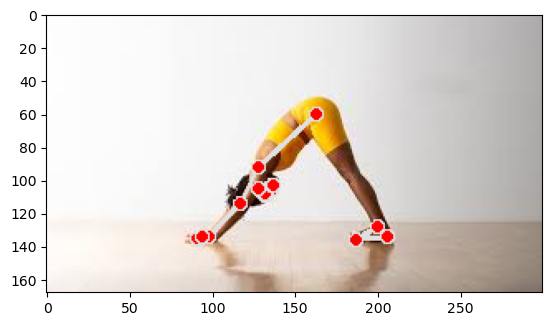

In [49]:
import matplotlib.pyplot as plt

path_to_image ='/kaggle/input/ddawnz/AADOWN.jpg'

(headX, headY, headZ,
                        neckXc, neckYc, neckZc,
                        rShoulderXc, rShoulderYc, rShoulderZc,
                        rElbowXc, rElbowYc, rElbowZc,
                        rWristXc, rWristYc, rWristZc,
                        lShoulderXc, lShoulderYc, lShoulderZc,
                        lElbowXc, lElbowYc, lElbowZc,
                        lWristXc, lWristYc ,lWristZc,
                        rHipXc, rHipYc, rHipZc,
                        rKneeXc, rKneeYc, rKneeZc,
                        rAnkleXc, rAnkleYc, rAnkleZc,
                        lHipXc, lHipYc, lHipZc,
                        lKneeXc, lKneeYc, lKneeZc,
                        lAnkleXc, lAnkleYc, lAnkleZc, output_IMG) = extract_feature(path_to_image)

plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [50]:
input_IMG = np.array([[[headX], [headY], [headZ],
                        [neckXc], [neckYc], [neckZc],
                        [rShoulderXc], [rShoulderYc], [rShoulderZc],
                        [rElbowXc], [rElbowYc], [rElbowZc],
                        [rWristXc], [rWristYc], [rWristZc],
                        [lShoulderXc], [lShoulderYc], [lShoulderZc],
                        [lElbowXc], [lElbowYc], [lElbowZc],
                        [lWristXc], [lWristYc] ,[lWristZc],
                        [rHipXc], [rHipYc], [rHipZc],
                        [rKneeXc], [rKneeYc], [rKneeZc],
                        [rAnkleXc], [rAnkleYc], [rAnkleZc],
                        [lHipXc], [lHipYc], [lHipZc],
                        [lKneeXc], [lKneeYc], [lKneeZc],
                        [lAnkleXc], [lAnkleYc], [lAnkleZc]]])
print(model2.predict(input_IMG))
predicted_output = model2.predict(input_IMG)
predicted_class = np.argmax(predicted_output, axis=1)
print(predicted_class)
if predicted_class[0]==0:
  print('downdog')
elif predicted_class[0]==1:
    print('goddess')
elif predicted_class[0]==2:
    print('plank')
elif predicted_class[0]==3:
      print('tree')
else:
    print('warrior2')


1/1 [==============================] - 0s 21ms/step
[[0.64311606 0.03718004 0.24618149 0.02009696 0.05342545]]
1/1 [==============================] - 0s 21ms/step
[0]
downdog
